In [1]:
############################################## Importing Libraries ##################################################

In [68]:
pip install cb

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import lightgbm as lgb
import xgboost as xgb
#import catboost as cb
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [119]:
############################################## Data Loading Starts Here #############################################

In [120]:
df_tr = pd.read_csv('Flight_Passenger_Satisfaction.csv')

In [121]:
df_tr.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [122]:
############################################## Data Preparation Starts Here #############################################

In [123]:
dupl = df_tr.groupby(['id']).size()>1
dupl.value_counts()
#Checking that there are no duplicates (no values that are true)

False    103904
dtype: int64

In [124]:
df_tr = df_tr.drop(['id'], axis = 1) #Further dropping un-needed attribute

In [125]:
df_tr.isnull().sum()

Unnamed: 0                             0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [126]:
df_tr['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [127]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [128]:
df_tr['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

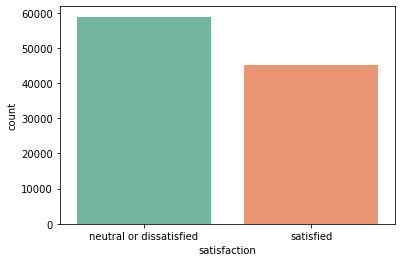

In [129]:
sns.countplot(x='satisfaction',data=df_tr,palette='Set2')
plt.show()

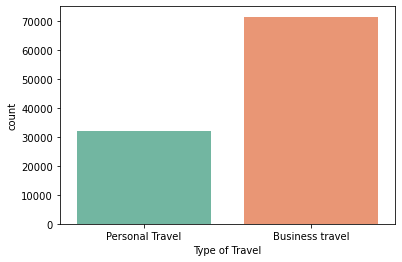

In [130]:
sns.countplot(x='Type of Travel',data=df_tr,palette='Set2')
plt.show()

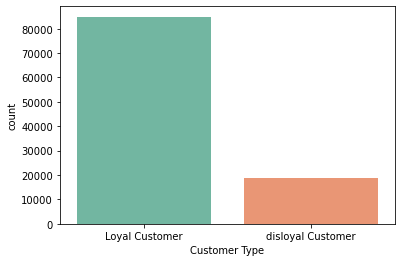

In [131]:
sns.countplot(x='Customer Type',data=df_tr,palette='Set2')
plt.show()

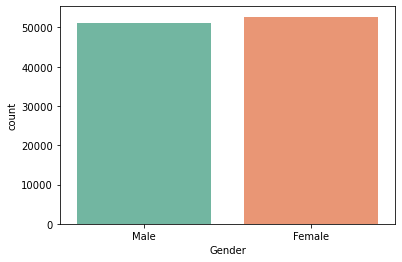

In [132]:
sns.countplot(x='Gender',data=df_tr,palette='Set2')
plt.show()

In [133]:
df_tr['Gender'] = df_tr['Gender'].replace({"Male": 0, "Female": 1})
df_tr['satisfaction'] = df_tr['satisfaction'].replace({"neutral or dissatisfied": 0, "satisfied": 1})
df_tr['Type of Travel'] = df_tr['Type of Travel'].replace({"Personal Travel": 0, "Business travel": 1})
df_tr['Customer Type'] = df_tr['Customer Type'].replace({"disloyal Customer": 0, "Loyal Customer": 1})
df_tr['Class'] = df_tr['Class'].replace({"Eco": 0, "Eco Plus": 1, "Business": 2})
df_tr

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,1,13,0,1,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,1,0,0,25,1,2,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,2,1,1,26,1,2,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,1,1,25,1,2,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,4,0,1,61,1,2,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,1,0,23,1,0,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,0
103900,103900,0,1,49,1,2,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,103901,0,0,30,1,2,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,0
103902,103902,1,0,22,1,0,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,0


In [134]:
df_tr.groupby(['Class', 'Gender'])['satisfaction'].count()

Class  Gender
0      0         22887
       1         23858
1      0          3552
       1          3942
2      0         24738
       1         24927
Name: satisfaction, dtype: int64

C:\Softwares\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

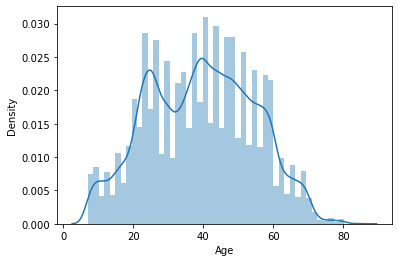

In [135]:
sns.distplot(df_tr['Age'])

C:\Softwares\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Flight Distance', ylabel='Density'>

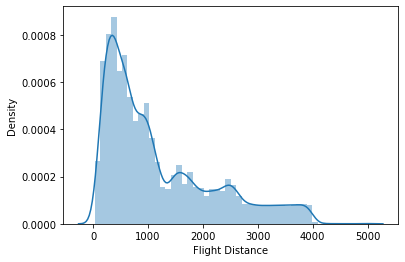

In [136]:
sns.distplot(df_tr['Flight Distance'])

In [137]:
corr_matrix = df_tr.corr()
corr_matrix

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Unnamed: 0,1.000000,-0.003978,0.002844,0.004786,-0.000856,0.000798,0.002794,-0.002490,0.000739,0.001913,...,0.001363,0.000813,0.004052,-0.000526,-0.004321,-0.000134,-0.001117,-0.000045,-0.000045,-0.004731
Gender,-0.003978,1.000000,-0.031732,-0.008928,0.006909,-0.008253,-0.005828,-0.008974,-0.009142,-0.006951,...,-0.006117,-0.008156,-0.031798,-0.037391,-0.010563,-0.039410,-0.006505,-0.002935,-0.000396,-0.012211
Customer Type,0.002844,-0.031732,1.000000,0.281674,-0.308333,0.105735,0.225200,0.007543,0.206869,0.019509,...,0.109930,0.056560,0.047868,-0.024723,0.032177,-0.022670,0.083613,-0.004036,-0.004747,0.187638
Age,0.004786,-0.008928,0.281674,1.000000,0.048524,0.140565,0.099461,0.017859,0.038125,0.024842,...,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012147,0.137167
Type of Travel,-0.000856,0.006909,-0.308333,0.048524,1.000000,0.545257,0.267344,0.105085,-0.259763,0.133511,...,0.148199,0.056543,0.138803,0.031321,-0.016751,0.022599,0.079207,0.005432,0.005683,0.449000
Class,0.000798,-0.008253,0.105735,0.140565,0.545257,1.000000,0.451211,0.036279,-0.092788,0.106391,...,0.194366,0.209505,0.204964,0.160460,0.151613,0.156353,0.135818,-0.009637,-0.013674,0.494471
Flight Distance,0.002794,-0.005828,0.225200,0.099461,0.267344,0.451211,1.000000,0.007131,-0.020043,0.065717,...,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002426,0.298780
Inflight wifi service,-0.002490,-0.008974,0.007543,0.017859,0.105085,0.036279,0.007131,1.000000,0.343845,0.715856,...,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019095,0.284245
Departure/Arrival time convenient,0.000739,-0.009142,0.206869,0.038125,-0.259763,-0.092788,-0.020043,0.343845,1.000000,0.436961,...,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000864,-0.051601
Ease of Online booking,0.001913,-0.006951,0.019509,0.024842,0.133511,0.106391,0.065717,0.715856,0.436961,1.000000,...,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.007984,0.171705


In [138]:
df_tr.dtypes

Unnamed: 0                             int64
Gender                                 int64
Customer Type                          int64
Age                                    int64
Type of Travel                         int64
Class                                  int64
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Customer Type'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Type of Travel'}>],
       [<AxesSubplot:title={'center':'Class'}>,
        <AxesSubplot:title={'center':'Flight Distance'}>,
        <AxesSubplot:title={'center':'Inflight wifi service'}>,
        <AxesSubplot:title={'center':'Departure/Arrival time convenient'}>,
        <AxesSubplot:title={'center':'Ease of Online booking'}>],
       [<AxesSubplot:title={'center':'Gate location'}>,
        <AxesSubplot:title={'center':'Food and drink'}>,
        <AxesSubplot:title={'center':'Online boarding'}>,
        <AxesSubplot:title={'center':'Seat comfort'}>,
        <AxesSubplot:title={'center':'Inflight entertainment'}>],
       [<AxesSubplot:title={'center':'On-board service'}>,
        <AxesSubplot:title={'center':'Leg room service'}>,
        <AxesSub

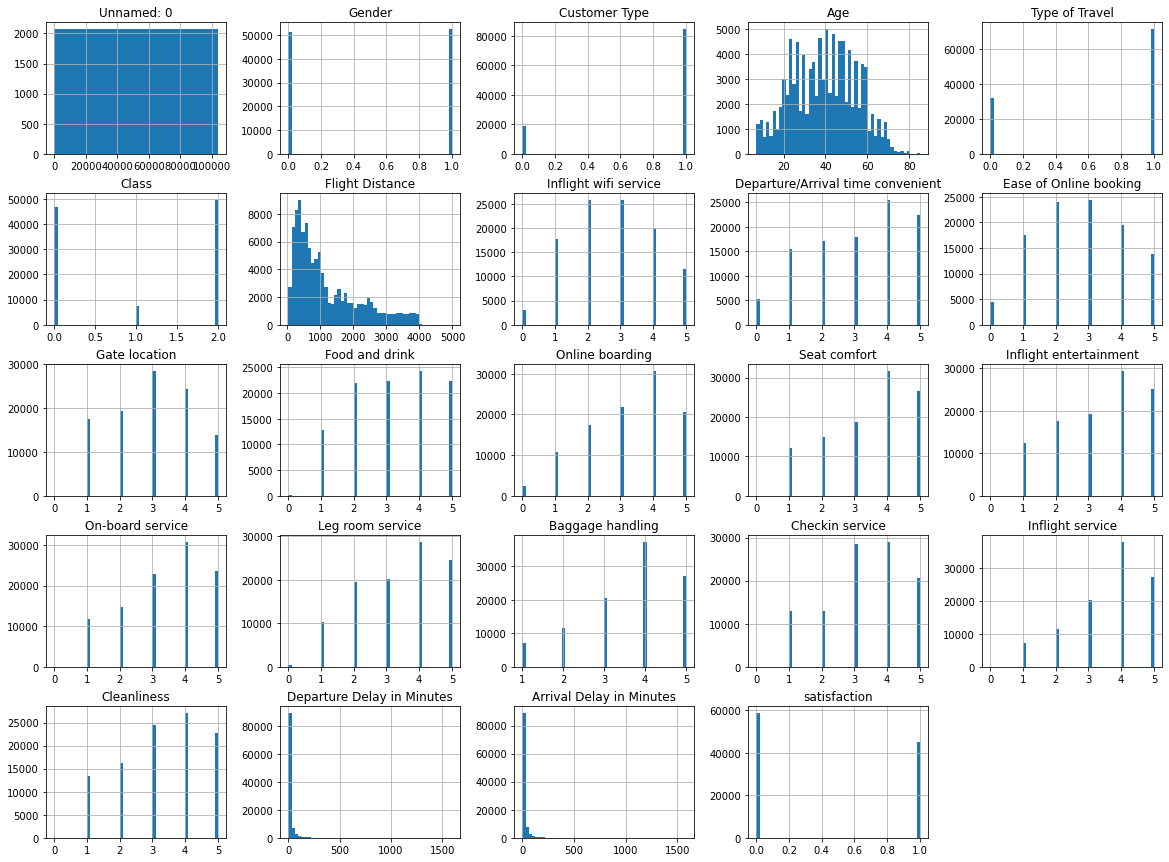

In [139]:
df_tr.hist(bins=50, figsize=(20,15))

In [140]:
df_tr.drop(columns=['Arrival Delay in Minutes'], inplace=True)

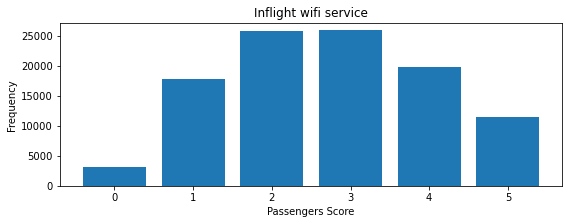

Inflight wifi service: 
 3    25868
2    25830
4    19794
1    17840
5    11469
0     3103
Name: Inflight wifi service, dtype: int64


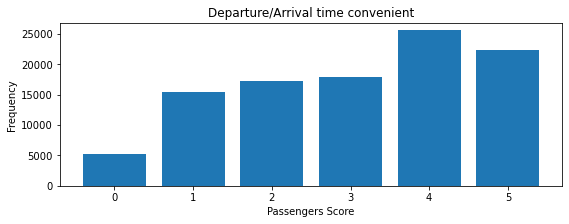

Departure/Arrival time convenient: 
 4    25546
5    22403
3    17966
2    17191
1    15498
0     5300
Name: Departure/Arrival time convenient, dtype: int64


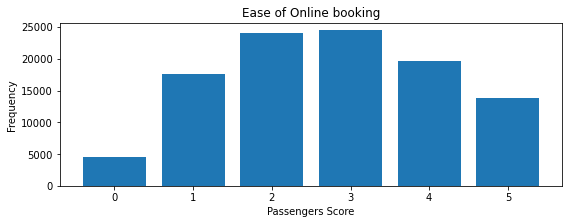

Ease of Online booking: 
 3    24449
2    24021
4    19571
1    17525
5    13851
0     4487
Name: Ease of Online booking, dtype: int64


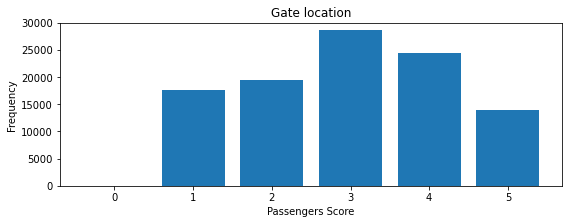

Gate location: 
 3    28577
4    24426
2    19459
1    17562
5    13879
0        1
Name: Gate location, dtype: int64


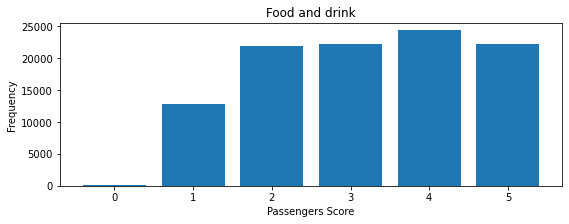

Food and drink: 
 4    24359
5    22313
3    22300
2    21988
1    12837
0      107
Name: Food and drink, dtype: int64


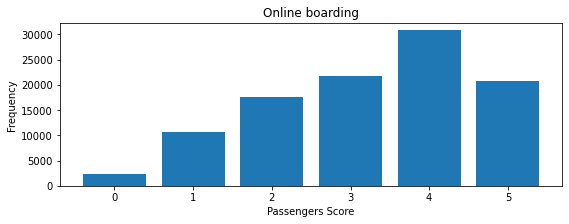

Online boarding: 
 4    30762
3    21804
5    20713
2    17505
1    10692
0     2428
Name: Online boarding, dtype: int64


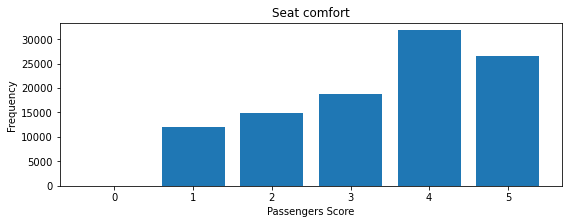

Seat comfort: 
 4    31765
5    26470
3    18696
2    14897
1    12075
0        1
Name: Seat comfort, dtype: int64


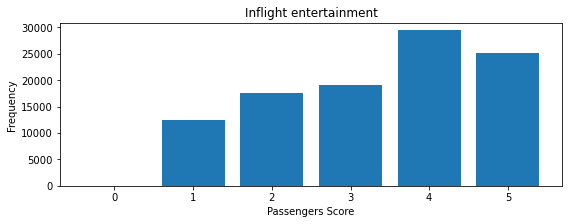

Inflight entertainment: 
 4    29423
5    25213
3    19139
2    17637
1    12478
0       14
Name: Inflight entertainment, dtype: int64


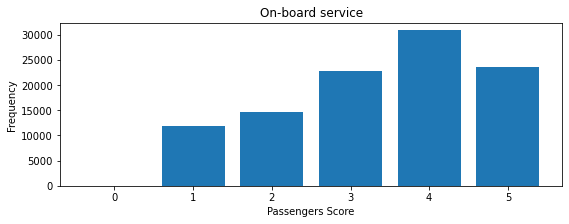

On-board service: 
 4    30867
5    23648
3    22833
2    14681
1    11872
0        3
Name: On-board service, dtype: int64


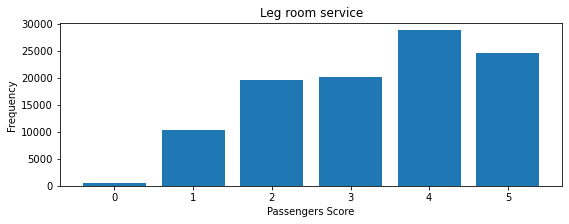

Leg room service: 
 4    28789
5    24667
3    20098
2    19525
1    10353
0      472
Name: Leg room service, dtype: int64


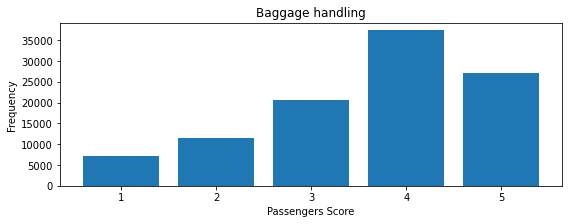

Baggage handling: 
 4    37383
5    27131
3    20632
2    11521
1     7237
Name: Baggage handling, dtype: int64


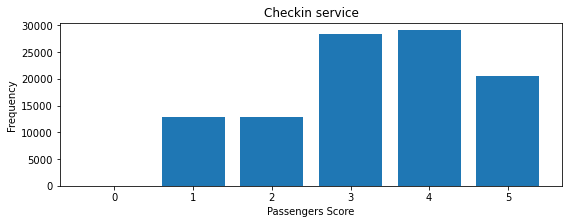

Checkin service: 
 4    29055
3    28446
5    20619
2    12893
1    12890
0        1
Name: Checkin service, dtype: int64


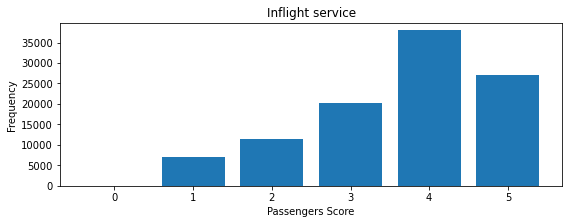

Inflight service: 
 4    37945
5    27116
3    20299
2    11457
1     7084
0        3
Name: Inflight service, dtype: int64


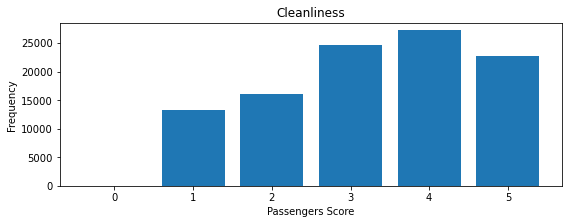

Cleanliness: 
 4    27179
3    24574
5    22689
2    16132
1    13318
0       12
Name: Cleanliness, dtype: int64


In [141]:
def bar_plot(variable):
    
    var=df_tr[variable]
    var_Value=var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_Value.index,var_Value.values)
    
    plt.xlabel("Passengers Score")
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,var_Value))
    
category1=["Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking", "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", "Baggage handling", "Checkin service", "Inflight service", "Cleanliness",]
for c in category1:
    bar_plot(c)

In [142]:
df_corr = df_tr.corr()
df_corr

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
Unnamed: 0,1.000000,-0.003978,0.002844,0.004786,-0.000856,0.000798,0.002794,-0.002490,0.000739,0.001913,...,0.000044,0.001363,0.000813,0.004052,-0.000526,-0.004321,-0.000134,-0.001117,-0.000045,-0.004731
Gender,-0.003978,1.000000,-0.031732,-0.008928,0.006909,-0.008253,-0.005828,-0.008974,-0.009142,-0.006951,...,0.026502,-0.006117,-0.008156,-0.031798,-0.037391,-0.010563,-0.039410,-0.006505,-0.002935,-0.012211
Customer Type,0.002844,-0.031732,1.000000,0.281674,-0.308333,0.105735,0.225200,0.007543,0.206869,0.019509,...,0.159484,0.109930,0.056560,0.047868,-0.024723,0.032177,-0.022670,0.083613,-0.004036,0.187638
Age,0.004786,-0.008928,0.281674,1.000000,0.048524,0.140565,0.099461,0.017859,0.038125,0.024842,...,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,0.137167
Type of Travel,-0.000856,0.006909,-0.308333,0.048524,1.000000,0.545257,0.267344,0.105085,-0.259763,0.133511,...,0.124399,0.148199,0.056543,0.138803,0.031321,-0.016751,0.022599,0.079207,0.005432,0.449000
Class,0.000798,-0.008253,0.105735,0.140565,0.545257,1.000000,0.451211,0.036279,-0.092788,0.106391,...,0.227444,0.194366,0.209505,0.204964,0.160460,0.151613,0.156353,0.135818,-0.009637,0.494471
Flight Distance,0.002794,-0.005828,0.225200,0.099461,0.267344,0.451211,1.000000,0.007131,-0.020043,0.065717,...,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,0.298780
Inflight wifi service,-0.002490,-0.008974,0.007543,0.017859,0.105085,0.036279,0.007131,1.000000,0.343845,0.715856,...,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,0.284245
Departure/Arrival time convenient,0.000739,-0.009142,0.206869,0.038125,-0.259763,-0.092788,-0.020043,0.343845,1.000000,0.436961,...,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.051601
Ease of Online booking,0.001913,-0.006951,0.019509,0.024842,0.133511,0.106391,0.065717,0.715856,0.436961,1.000000,...,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,0.171705


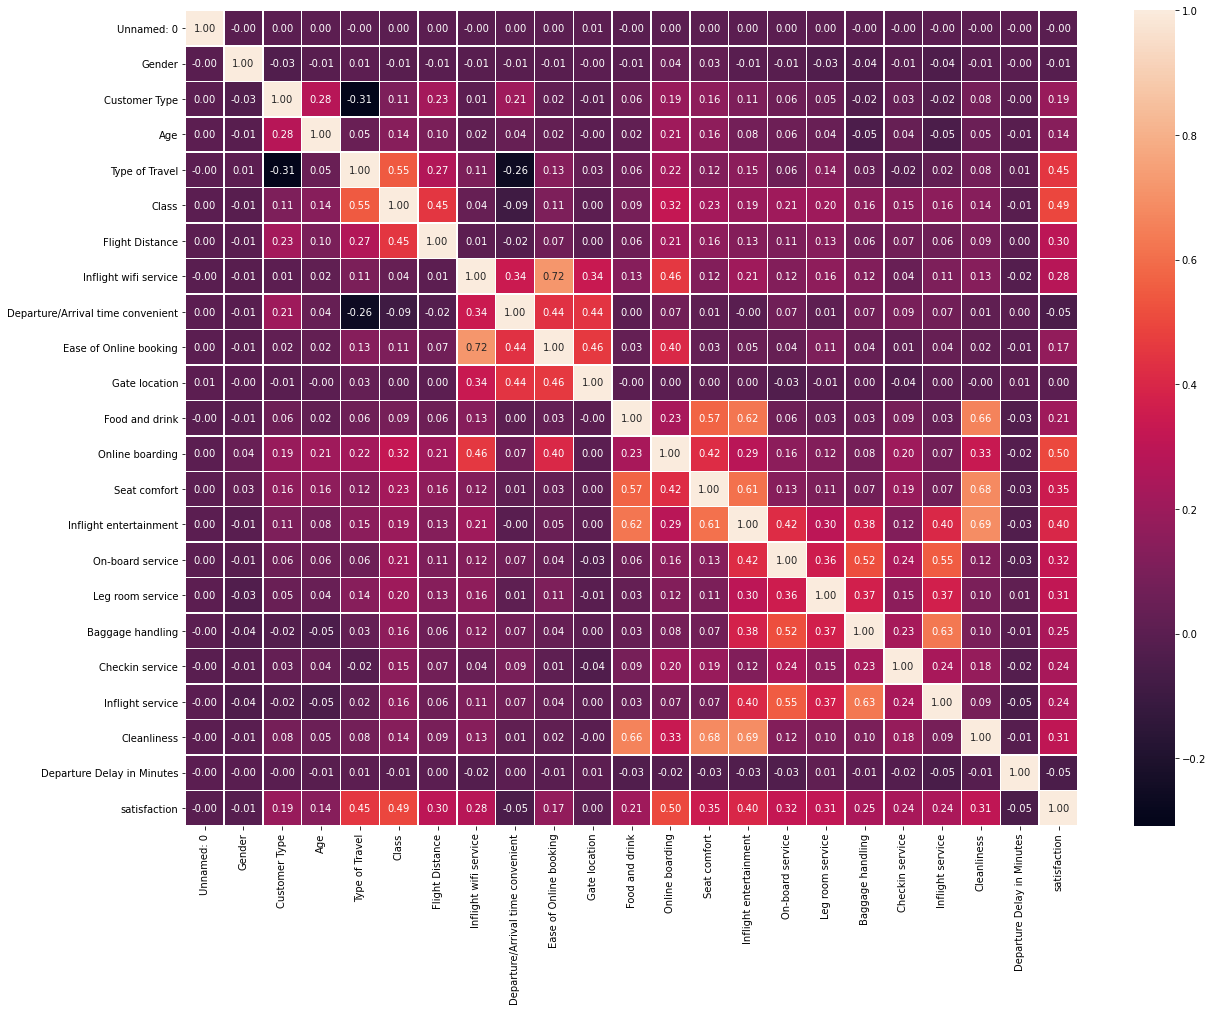

In [143]:
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(df_corr, annot=True, linewidth=".5", fmt=".2f")
plt.show()

<AxesSubplot:ylabel='Frequency'>

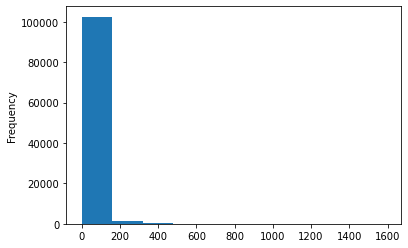

In [144]:
df_tr['Departure Delay in Minutes'].plot(kind='hist')

In [145]:
val=df_tr['Departure Delay in Minutes'].mean()
val

14.815618263012011

In [146]:
#replacing all the null values of  Delay in Minutes features with it's mean
df_tr['Departure Delay in Minutes'].replace(np.nan,val,inplace=True)

In [147]:
##################################################### MODELING ###########################################

In [148]:
from sklearn.model_selection import train_test_split
x = df_tr.drop(['satisfaction'], axis = 1)
y = df_tr['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

In [149]:
# Normalize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [150]:
################################################### DECISION TREE  ###################################################

In [151]:
from sklearn.tree import DecisionTreeClassifier

In [152]:
clf = DecisionTreeClassifier(max_depth=12)

In [169]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12)

In [170]:
y_pred = clf.predict(X_test)

In [171]:
importances = clf.feature_importances_
importances

array([2.75175362e-03, 1.98921134e-04, 4.47366763e-02, 7.73847515e-03,
       1.66614089e-01, 2.10280681e-02, 4.59015443e-03, 1.97755874e-01,
       1.56621414e-03, 9.21628833e-04, 1.27576785e-02, 4.93240619e-04,
       4.09046715e-01, 9.71292550e-03, 5.08612373e-02, 2.81698251e-03,
       6.17140777e-03, 1.33686989e-02, 2.61201265e-02, 1.11871729e-02,
       6.93051462e-03, 2.63144451e-03])

In [172]:
features = np.array(df_tr.columns)

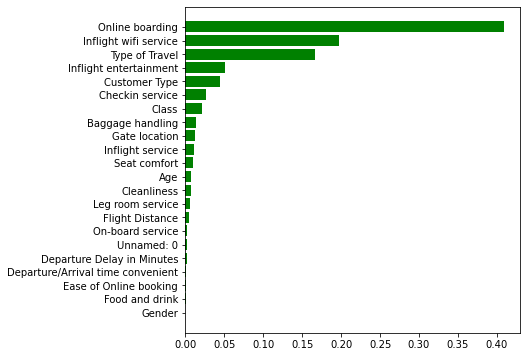

In [173]:
factor = np.argsort(importances)
plt.figure(figsize=(6,6))
plt.barh(range(len(factor)), importances[factor], color='g', align='center')
plt.yticks(range(len(factor)), features[factor])
plt.show()

In [174]:
#### EVALUATION

In [175]:
#Show the confusion matrix for each model with Recall and Precision
# Plot the confusion matrix for each model:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report , recall_score , precision_score, accuracy_score
#get_confusion_matrix(clf)
print(f'Accuracy Score:{accuracy_score(y_test, y_pred)}' )
print('Avg Precision:' +  str(precision))
print('Avg Recall:' + str(recall))
roc_auc = roc_auc_score(y_test, y_pred)
print('Avg ROC:' + str(roc_auc))
from sklearn import metrics 
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
2090.5509/(max(y)-min(y))
print('R Square:',metrics.r2_score(y_test, y_pred))

Accuracy Score:0.9485131363680108
Avg Precision:0.9617448098903663
Avg Recall:0.9172413793103448
Avg ROC:0.9447713274058467
MAE: 0.05148686363198922
MSE: 0.05148686363198922
RMSE: 0.2269071696354904
R Square: 0.7902393810098058


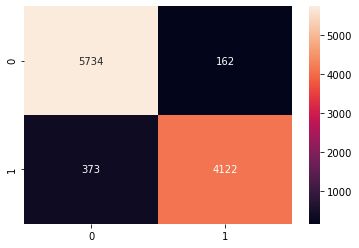

In [177]:
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, plot_confusion_matrix, classification_report
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

In [178]:
############################################## LightGBMClassifier  ###################################################

In [181]:
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    
    return model, roc_auc


              precision    recall  f1-score   support

           0    0.95413   0.98066   0.96721      5896
           1    0.97368   0.93815   0.95559      4495

    accuracy                        0.96228     10391
   macro avg    0.96390   0.95941   0.96140     10391
weighted avg    0.96258   0.96228   0.96218     10391



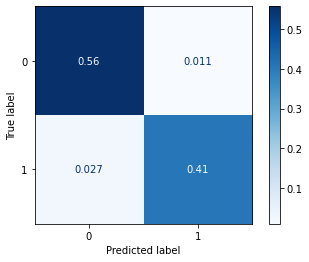

In [183]:
params_lgb ={'colsample_bytree': 0.85, 
         'max_depth': 15, 
         'min_split_gain': 0.1, 
         'n_estimators': 200, 
         'num_leaves': 50, 
         'reg_alpha': 1.2, 
         'reg_lambda': 1.2, 
         'subsample': 0.95, 
         'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, roc_auc_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test)
y_pred = model_lgb.predict(X_test)
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(model_lgb, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    

In [184]:
print(f'Accuracy Score:{accuracy_score(y_test, y_pred)}' )
print('Avg Precision:' +  str(precision))
print('Avg Recall:' + str(recall))
roc_auc = roc_auc_score(y_test, y_pred)
print('ROC:' + str(roc_auc))
from sklearn import metrics 
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
2090.5509/(max(y)-min(y))
print('R Square:',metrics.r2_score(y_test, y_pred))

Accuracy Score:0.9622750457126359
Avg Precision:0.9617448098903663
Avg Recall:0.9172413793103448
ROC:0.9594091807118719
MAE: 0.03772495428736407
MSE: 0.03772495428736407
RMSE: 0.1942291283184993
R Square: 0.8463062380483064


In [165]:
####################################################### END :) ##########################################################